<a href="https://colab.research.google.com/github/WambuiN/Moringa_IP/blob/main/Copy_of_WambuiNjoroge_DSCore_Week8_IP8_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Defining the Question


a) Specifying the Question

The goal for this analysis is to study the symptoms indicate that the patient has hypothyroid using the given information (dataset) The data collected focused on Thyroid patients. Later onwards, create a model that  that determines whether or not the patient's symptoms indicate that the patient has hypothyroid

b) Defining the Metric for Success

This analysis will be considered a success when we are able to effectively use specific supervised learning algorithms to the dataset in and identify the best prediction model that has the highest accuracy level.

c) Understanding the context

The data available for this project was provided by Nairobi Hospital which conducted a clinical camp to test for hypothyroidism. The dataset has information on that focused on Thyroid patients.

d) Recording the Experimental Design

Below are the steps that will be conducted in this analysis to answer the research question:

1. Load data and preview preliminary characteristics

2. Data Cleaning (check for and deal with outliers, anomalies and missing data)

3. Exploratory Analysis

4. Implementing the Solution

5. Challenging the Solution

6. Follow Up Questions

e) Data Relevance

The data available for this project was provided by Nairobi Hospital which conducted a clinical camp to test for hypothyroidism. The dataset has information on that focused on Thyroid patients.

Some of the attributes availbale in the dataset include status, age of the patient, sex among others.

 

# Importing Libraries and Loading Datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# 2. Reading the Data

In [4]:
# Loading the Dataset
# Dataset url = http://bit.ly/hypothyroid_data
#
health = pd.read_csv('/content/hypothyroid.csv')

health

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


# 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
#
health.shape

(3163, 26)

In [6]:
# Previewing the top of our dataset
#
health.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?


In [7]:
# Previewing the bottom of our dataset
# 
health.tail(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [8]:
# Checking whether each column has an appropriate datatype
#
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

The datatypes for some of the columns is not appropriate and will be converted apporiately

In [9]:
#Summary of Dataset
health.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


Summary data is inconclusive because of inappropriate datatypes

# 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

# 5. Tidying the Dataset

In [10]:
#health2 = health.apply(pd.to_numeric)

In [11]:
#Checking unique values
health.status.unique()

array(['hypothyroid', 'negative'], dtype=object)

In [12]:
# Identifying the Missing Data
health.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [13]:
#checking for duplicates in Results dataset
health.duplicated().sum()

77

In [14]:
health.duplicated().any()

True

In [15]:
#Dropping Duplicates
health.drop_duplicates(keep='first', inplace = True)

In [16]:
health.duplicated().sum()

0

In [17]:
health.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [18]:
#Dropping unneccesary columns
health.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG',],axis=1, inplace=True)

In [19]:
health.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,30,0.60,15,1.48,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,145,1.70,19,1.13,17
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,0,0.20,4,1,0


In [20]:
#Checking unique values
health.on_thyroxine.unique()

array(['f', 't'], dtype=object)

In [21]:
health.sex.unique()

array(['M', 'F', '?'], dtype=object)

In [22]:
health.thyroid_surgery.unique()

array(['f', 't'], dtype=object)

In [23]:
health.T3.unique()

array(['0.60', '1.70', '0.20', '0.40', '1.20', '1.10', '1.30', '1.90',
       '?', '0.80', '2.20', '1.50', '2.70', '2', '0.30', '2.10', '0.50',
       '0.70', '1', '1.40', '2.30', '2.40', '0.90', '1.80', '0', '2.80',
       '1.60', '6.70', '3.30', '3', '2.50', '2.60', '4', '9.80', '3.90',
       '3.40', '3.80', '4.50', '3.20', '3.70', '4.30', '2.90', '3.10',
       '3.50', '3.60', '6.60', '4.90', '8.90', '4.10', '5', '5.30',
       '7.60', '7.30', '4.20', '4.40', '5.10', '7', '0.10', '0.05',
       '4.70', '6.20', '5.50', '4.60', '6.10', '8.10', '5.20', '5.60',
       '4.80', '10.20', '8.60'], dtype=object)

In [24]:
health.sick.unique()

array(['f', 't'], dtype=object)

It is observed that there are are still invalid entries in the dataset i.e. "?", that hinder conversion of the datatypes. They should be removed.

In [25]:
#Drop the invalid "?" inthe dataset
health1 = health[((health.age == '?') | ( health.sex == '?')| ( health.TSH == '?') | (health.T3 == '?') | (health.TT4 == '?') | (health.T4U == '?') | (health.FTI == '?'))].index
health.drop(health1, inplace=True)

In [26]:
#Confirming removal of the "?"
health.sex.unique()

array(['M', 'F'], dtype=object)

In [27]:
health.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [28]:
#Converting the Datatypes
#health.age= health['age'].astype(str).astype(float)
health.age= health['age'].astype(float).astype(int)
health.TSH= health['TSH'].astype(str).astype(float)
health.T3= health['T3'].astype(str).astype(float)
health.TT4= health['TT4'].astype(str).astype(float)
health.T40= health['T4U'].astype(str).astype(float)
health.FTI= health['FTI'].astype(str).astype(float)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [29]:
health.T4U= health['T4U'].astype(str).astype(float)

In [30]:
#Confirming the Datatypes
health.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
dtype: object

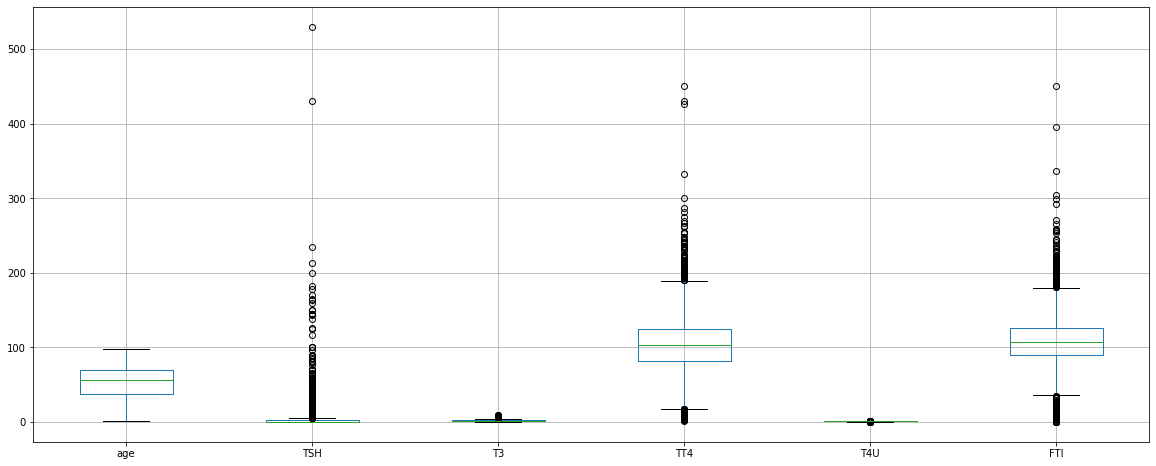

In [31]:
# Checking for Outliers
# plotting boxplots to check outliers. 
health2 = health
plt.figure(figsize = (20, 8))
health2.boxplot()
plt.show()

Outliers are observed but will be retained for analysis as they could be valid observations

In [32]:
health.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [33]:
#Label encoding of the categorical variables in the dataset
le = LabelEncoder()
health['status'] = le.fit_transform(health['status'])
health['sex'] = le.fit_transform(health['sex'])
health['on_thyroxine'] = le.fit_transform(health['on_thyroxine'])
health['query_on_thyroxine'] = le.fit_transform(health['query_on_thyroxine'])
health['on_antithyroid_medication'] = le.fit_transform(health['on_antithyroid_medication'])
health['thyroid_surgery'] = le.fit_transform(health['thyroid_surgery'])
health['query_hypothyroid'] = le.fit_transform(health['query_hypothyroid'])
health['query_hyperthyroid'] = le.fit_transform(health['query_hyperthyroid'])
health['pregnant'] = le.fit_transform(health['pregnant'])
health['sick'] = le.fit_transform(health['sick'])
health['tumor'] = le.fit_transform(health['tumor'])
health['lithium'] = le.fit_transform(health['lithium'])
health['goitre'] = le.fit_transform(health['goitre'])


health.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,0,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0


# 6. Exploratory Analysis

# Univariate Analysis

In [34]:
# Frequency table for status
#
health.status.value_counts()

1    1833
0     113
Name: status, dtype: int64

In [35]:
# Frequency table for sex
#
health.sex.value_counts()

0    1320
1     626
Name: sex, dtype: int64

In [36]:
# Frequency table for sex
#
health.pregnant.value_counts()

0    1898
1      48
Name: pregnant, dtype: int64

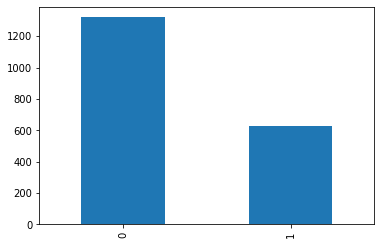

In [37]:

#Checking for sex counts

health['sex'].value_counts().plot(kind='bar')


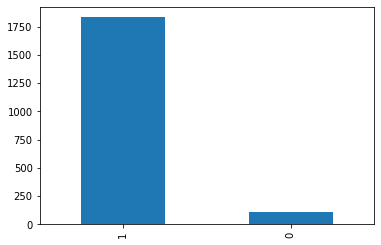

In [38]:
health['status'].value_counts().plot(kind='bar')

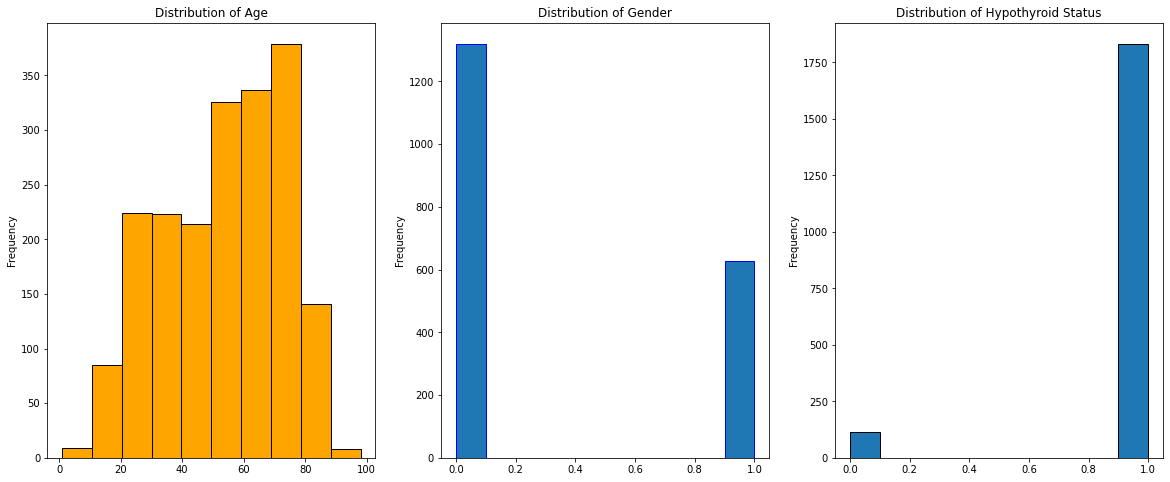

In [39]:
# histograms to show distribution of age, sex space and status
#
fig, ax=plt.subplots(1,3, figsize=(20,8))
health['age'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='orange')
ax[0].set_title('Distribution of Age')
health['sex'].plot.hist(ax=ax[1], bins=10, edgecolor='blue')
ax[1].set_title('Distribution of Gender')
health['status'].plot.hist(ax=ax[2], bins=10, edgecolor='black')
ax[2].set_title('Distribution of Hypothyroid Status')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Patients without Hypothyroid ')

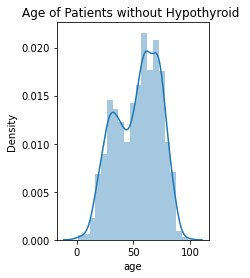

In [40]:
#Distribution of age of based on Stautus i.e negative and with Hypothyroid
plt.subplot(1, 2, 1)
sns.distplot(health.age)
plt.title('Age of Patients without Hypothyroid ')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Patients with Hypothyroid')

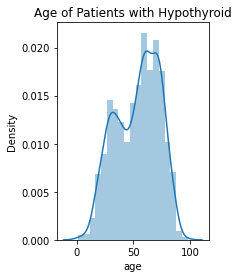

In [41]:
#Distribution of age of based on Stautus i.e negative and with Hypothyroid
plt.subplot(1, 2, 2)
sns.distplot(health.age)
plt.title('Age of Patients with Hypothyroid')

# Statistical Summary of the Dataset

In [42]:
health.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,0.941932,53.584789,0.321686,0.127441,0.010791,0.013875,0.036485,0.075540,0.071429,0.024666,0.041110,0.012847,0.001028,0.026208,5.957256,1.918911,107.246300,0.987744,110.140956
std,0.233932,19.258577,0.467243,0.333552,0.103346,0.117001,0.187542,0.264328,0.257606,0.155145,0.198596,0.112643,0.032050,0.159793,24.676600,0.955347,44.081825,0.230405,40.324629
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,2.000000,0.000000,0.000000
25%,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,82.000000,0.852500,90.000000
50%,1.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,1.800000,103.000000,0.960000,107.000000
75%,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,2.300000,125.000000,1.070000,126.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,9.800000,450.000000,2.030000,450.000000


# Bivariate Analysis

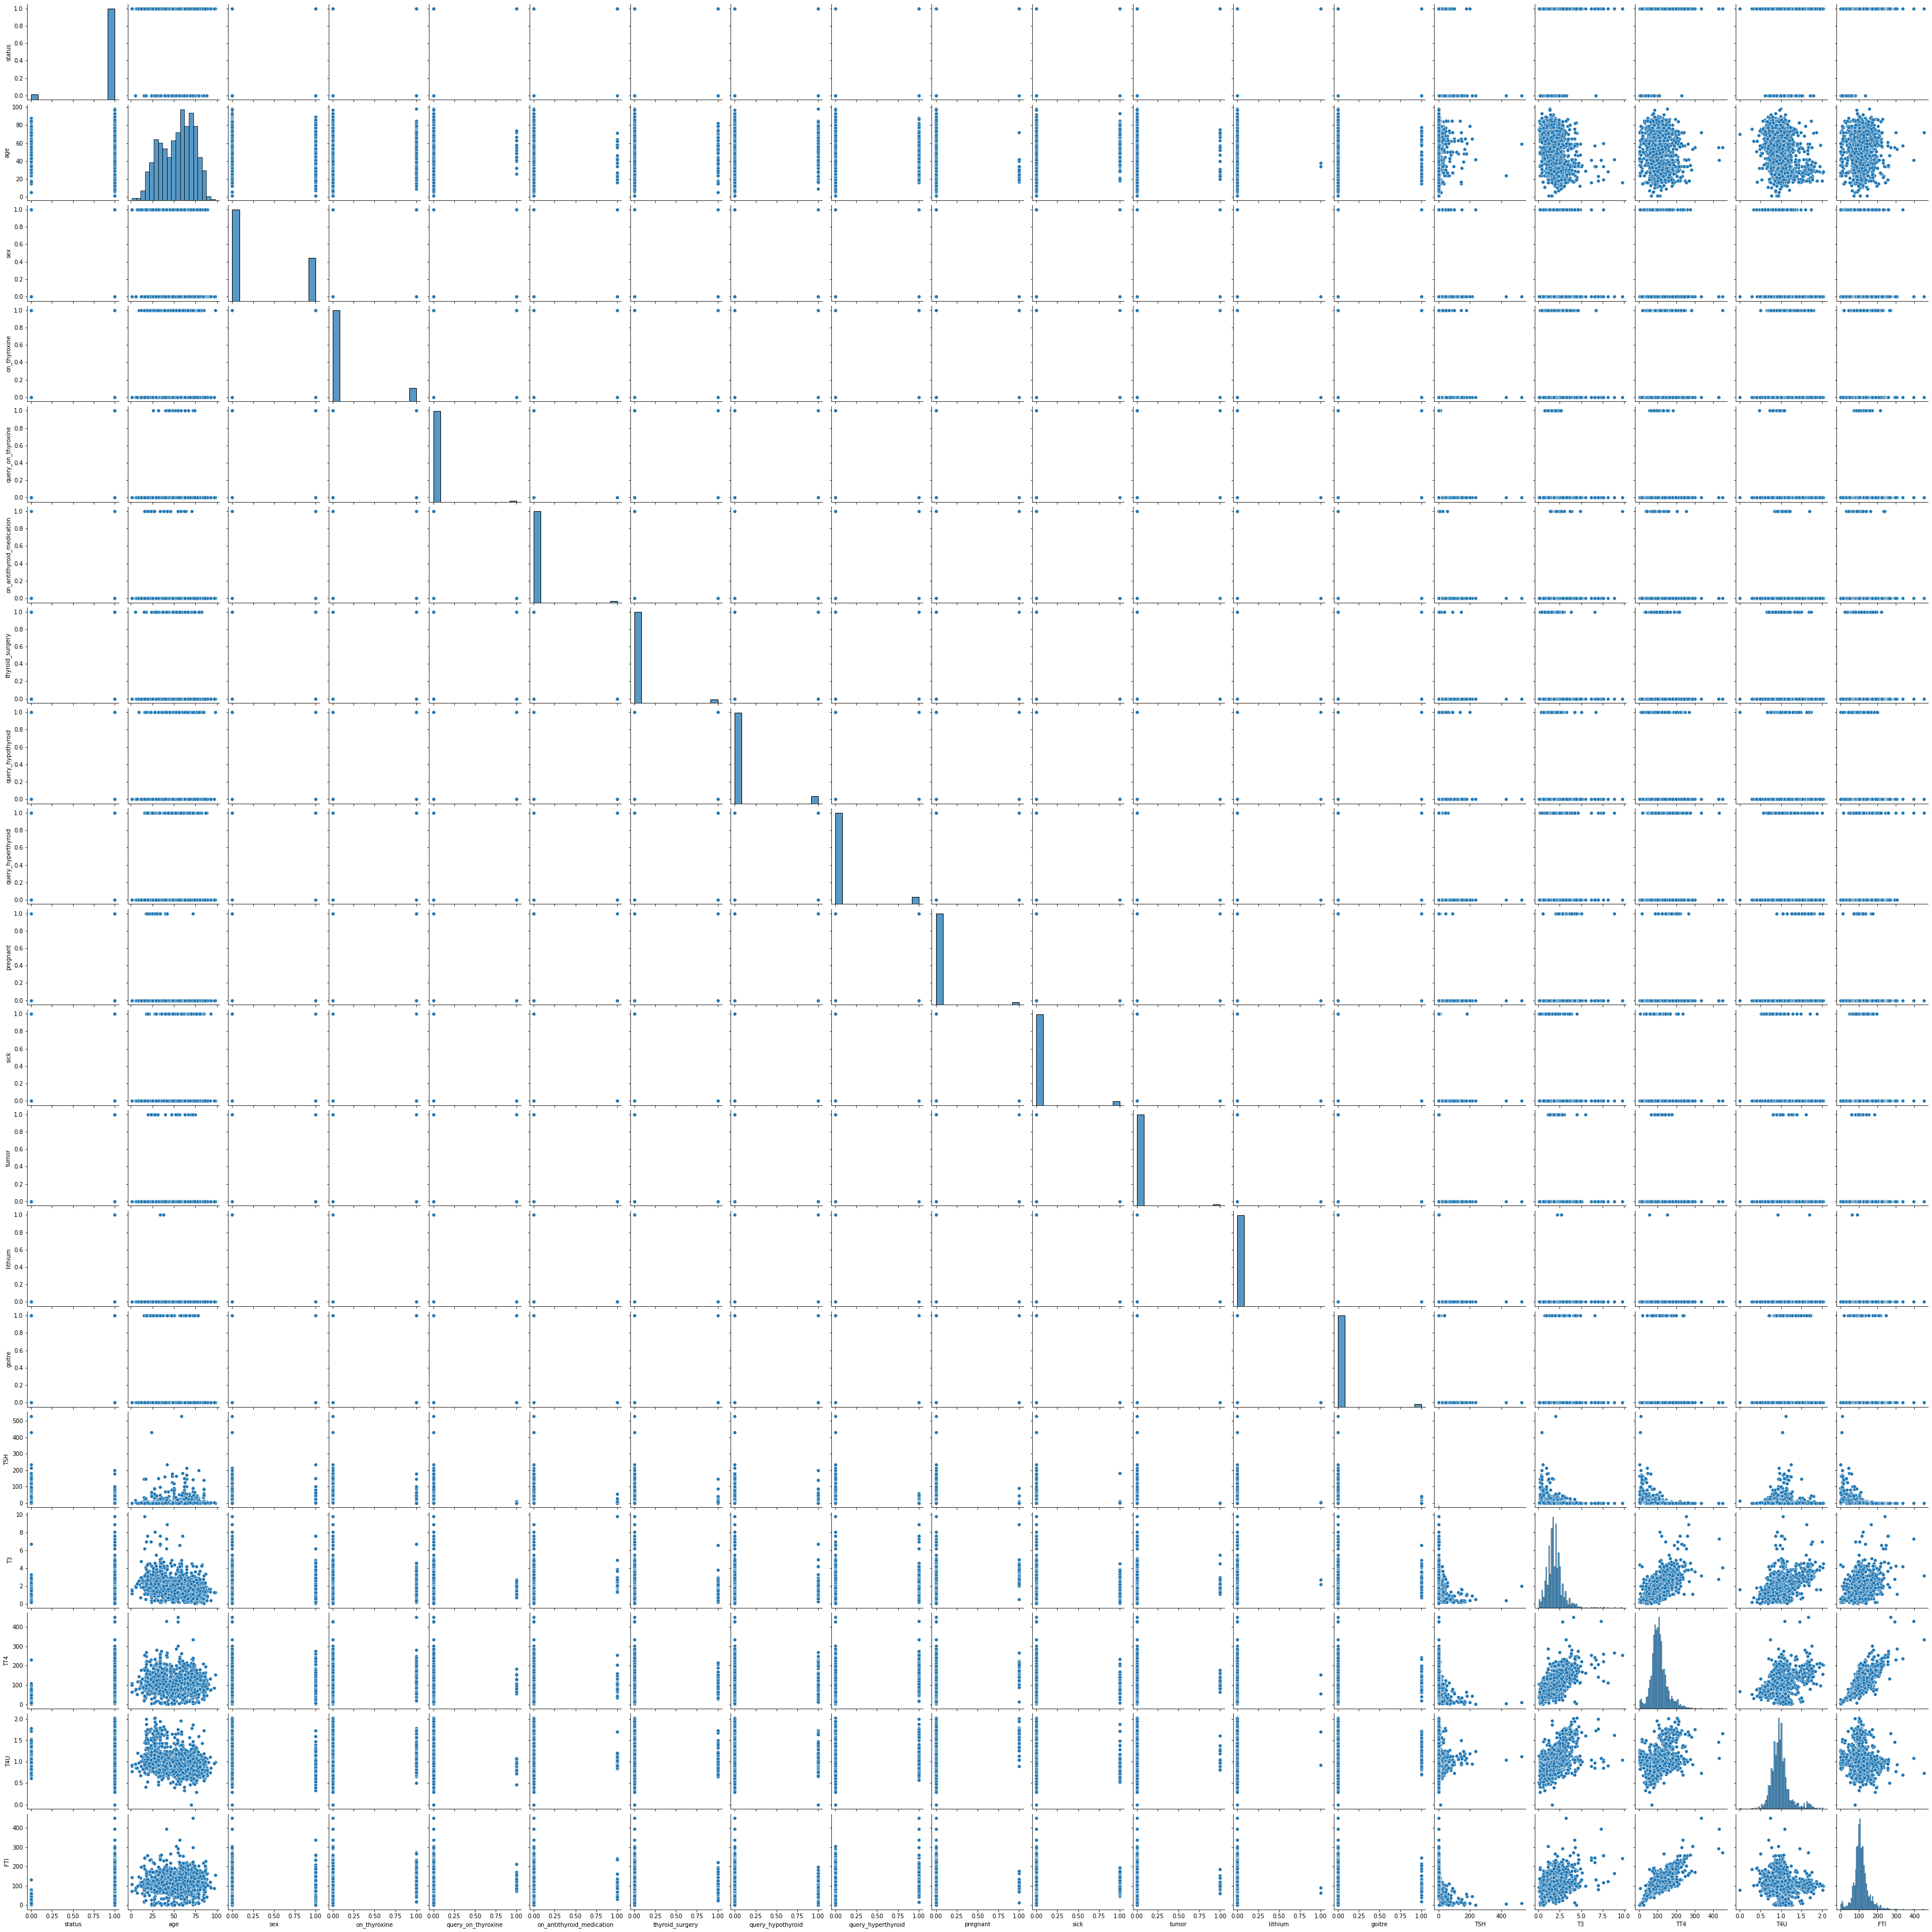

In [43]:
# Ploting the bivariate summaries and recording observations
#
sns.pairplot(health)
plt.show()

Text(0.5, 1.0, 'Multi-Collinearity of the Variables')

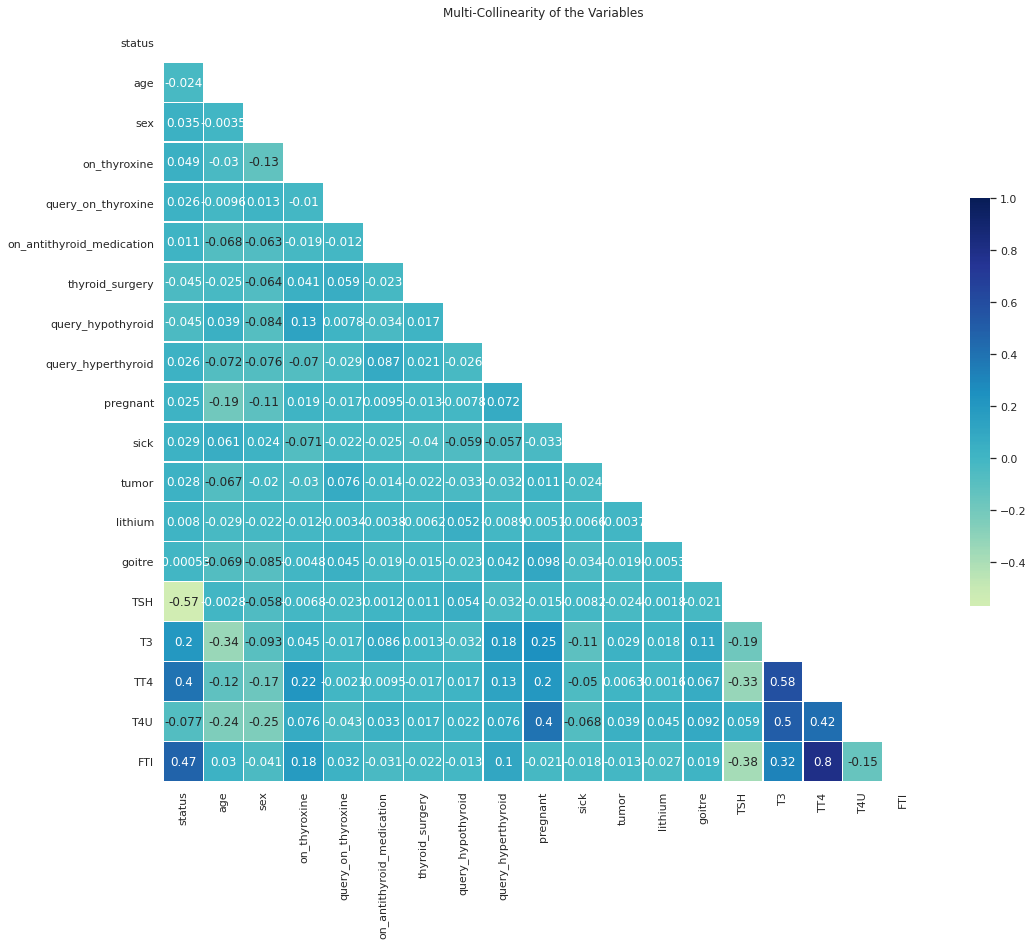

In [44]:
#heat map for correlation purposes
sns.set(style="white")
# Create a covariance matrix
corr = health.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17,15))
# Generate a custom diverging colormap
cmap = "YlGnBu"
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, annot = True,
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of the Variables')

Text(0.5, 1.0, 'Correlation between Age and Thyroid Stimulating Hormone Level')

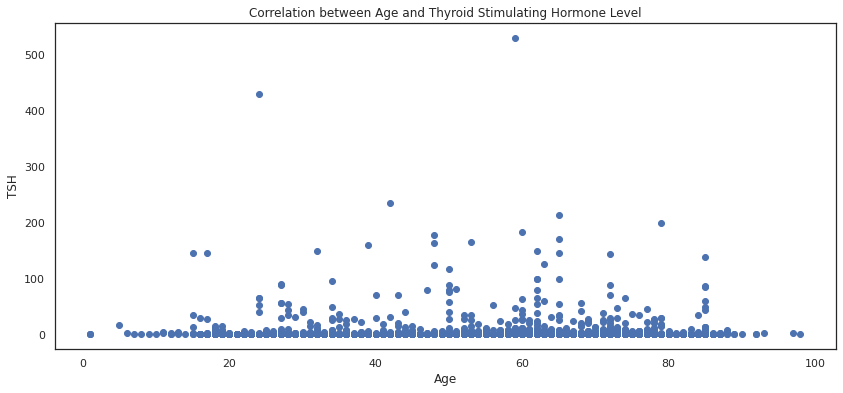

In [45]:
#Correlation between Age and Thyroid Stimulating Hormone T3
plt.figure(figsize = (14,6))
plt.scatter(health.age,health.TSH)
plt.xlabel('Age')
plt.ylabel('TSH')
plt.title('Correlation between Age and Thyroid Stimulating Hormone Level')

The thyroid stimulating hormone is observed to be well distributed across the age groups. 

# Multivariate Analysis

Principle Component Analysis (PCA)

In [46]:
#Loading the libraries
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [47]:
health.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,0,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,0,24,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,0,77,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


In [48]:
# defining the features and target variable
health3 = health
x = health3.drop(['status','age'],1)
y = health3['status']

# splitting the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# normalize feature set

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# applying PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# checking the variance explained by each principal component

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.1600653 , 0.09695064, 0.07463835, 0.06706307, 0.06402644,
       0.06113465, 0.05980806, 0.05811483, 0.05639855, 0.05319187,
       0.05256294, 0.0477138 , 0.04403736, 0.04368679, 0.03682419,
       0.02219489, 0.00158827])

In [49]:
# using PCA to train algorithm

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# making predictions using random forest classifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(x_test)

# evaluating the model with only one principal component
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 13  15]
 [  1 361]]
Accuracy 0.958974358974359


The random forest algorithm is able to correctly predict with an accuracy of 95% which is very good.

 Factor Analysis

In [50]:
# evaluating the “factorability” of our dataset

!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(health3)
chi_square_value, p_value

(9425.517102882948, 0.0)

In [51]:
# checking the Kaiser-Meyer-Olkin (KMO) Test
#
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(health3)

kmo_model

0.5437576640605363

kmo_model is 0.5 is inadequate and cannot proceed with factor analysis.

# Feature Engineering

Checking for Multicollinearity

In [52]:
correlations = health.corr()
correlations

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
status,1.000000,-0.024413,0.034575,0.048765,0.025933,0.010667,-0.045437,-0.045432,0.026205,0.025319,0.029276,0.028325,0.007964,-0.000530,-0.568868,0.198161,0.399251,-0.076930,0.467834
age,-0.024413,1.000000,-0.003547,-0.030336,-0.009630,-0.068176,-0.025128,0.038989,-0.071848,-0.191360,0.060925,-0.066745,-0.029295,-0.068803,-0.002758,-0.340214,-0.119130,-0.242962,0.030210
sex,0.034575,-0.003547,1.000000,-0.127926,0.013252,-0.062876,-0.063600,-0.084456,-0.075667,-0.109515,0.023632,-0.019949,-0.022089,-0.085430,-0.057868,-0.092994,-0.173527,-0.248091,-0.041347
on_thyroxine,0.048765,-0.030336,-0.127926,1.000000,-0.010086,-0.018983,0.040698,0.129843,-0.070093,0.018706,-0.071369,-0.029914,-0.012258,-0.004818,-0.006829,0.045032,0.220533,0.076061,0.183558
query_on_thyroxine,0.025933,-0.009630,0.013252,-0.010086,1.000000,-0.012389,0.059256,0.007786,-0.028968,-0.016610,-0.021626,0.076416,-0.003350,0.045132,-0.022520,-0.017170,-0.002051,-0.042593,0.031712
on_antithyroid_medication,0.010667,-0.068176,-0.062876,-0.018983,-0.012389,1.000000,-0.023082,-0.033907,0.086510,0.009461,-0.024560,-0.013532,-0.003805,-0.019459,0.001205,0.085966,-0.009535,0.033203,-0.030600
thyroid_surgery,-0.045437,-0.025128,-0.063600,0.040698,0.059256,-0.023082,1.000000,0.016975,0.020524,-0.013275,-0.040292,-0.022199,-0.006242,-0.014767,0.010741,0.001312,-0.017070,0.017255,-0.021892
query_hypothyroid,-0.045432,0.038989,-0.084456,0.129843,0.007786,-0.033907,0.016975,1.000000,-0.026427,-0.007847,-0.059188,-0.032610,0.051520,-0.022550,0.053720,-0.032128,0.016582,0.022047,-0.013155
query_hyperthyroid,0.026205,-0.071848,-0.075667,-0.070093,-0.028968,0.086510,0.020524,-0.026427,1.000000,0.071673,-0.057427,-0.031640,-0.008896,0.041931,-0.032414,0.182739,0.131017,0.075739,0.104898
pregnant,0.025319,-0.191360,-0.109515,0.018706,-0.016610,0.009461,-0.013275,-0.007847,0.071673,1.000000,-0.032928,0.011278,-0.005101,0.098344,-0.014784,0.246606,0.202765,0.395508,-0.021430


In [53]:
# Use calculated correlations to compute the VIF score for each variable

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
status,1.693513,0.046199,-0.022935,0.011920,-0.015365,-0.033742,0.048452,0.027738,0.036034,-0.051355,-0.049775,-0.032699,-0.029063,0.028444,0.747871,-0.030630,-0.502548,0.323483,-0.059698
age,0.046199,1.190086,0.069674,0.058776,0.019275,0.043136,0.032393,-0.036809,0.024505,0.116606,-0.018077,0.066705,0.027930,0.034936,0.053862,0.407126,0.069887,-0.021724,-0.231600
sex,-0.022935,0.069674,1.125498,0.096638,-0.010406,0.079582,0.068141,0.071771,0.068568,0.023124,0.007633,0.034023,0.017886,0.081451,0.070377,-0.097954,0.054156,0.293358,0.093005
on_thyroxine,0.011920,0.058776,0.096638,1.112522,0.016642,0.004149,-0.040056,-0.117044,0.108060,0.017986,0.072253,0.034007,0.020623,0.015889,-0.058426,0.129132,-0.362597,0.039022,0.014386
query_on_thyroxine,-0.015365,0.019275,-0.010406,0.016642,1.018445,0.003711,-0.064404,-0.015623,0.030714,0.003633,0.021238,-0.079030,0.001892,-0.053603,0.005728,0.019733,0.110604,-0.026368,-0.130101
on_antithyroid_medication,-0.033742,0.043136,0.079582,0.004149,0.003711,1.029338,0.032883,0.032658,-0.073198,0.017366,0.015926,0.022178,0.007948,0.038398,-0.003298,-0.118993,0.080933,0.017053,0.031607
thyroid_surgery,0.048452,0.032393,0.068141,-0.040056,-0.064404,0.032883,1.018177,-0.005160,-0.022998,0.025209,0.033389,0.030811,0.009659,0.027114,0.034001,-0.008848,0.139053,-0.069789,-0.090747
query_hypothyroid,0.027738,-0.036809,0.071771,-0.117044,-0.015623,0.032658,-0.005160,1.042384,0.013251,0.007655,0.058962,0.029830,-0.054741,0.025838,-0.036124,0.037284,-0.327490,0.158899,0.286734
query_hyperthyroid,0.036034,0.024505,0.068568,0.108060,0.030714,-0.073198,-0.022998,0.013251,1.065670,-0.035776,0.044793,0.039291,0.011348,-0.017163,-0.004562,-0.150663,0.086904,-0.030056,-0.177042
pregnant,-0.051355,0.116606,0.023124,0.017986,0.003633,0.017366,0.025209,0.007655,-0.035776,1.212138,0.001906,0.012711,0.029800,-0.064159,0.008912,-0.012520,0.003723,-0.442065,-0.009927


The VIF score is found along the diagonal from top left to bottom right. Some VIF scores are above 5, we can say there  is high correlation between the independent variables.

## 7. Implementing the Solution

## 1. Decision Trees

In [54]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = health3['status'].values


test_features = health3.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = health3[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,584.000000,584.000000
mean,0.938356,0.936593
std,0.240714,0.218487
min,0.000000,0.004086
25%,1.000000,0.999927
50%,1.000000,0.999927
75%,1.000000,0.999927
max,1.000000,0.999927


In [55]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.018479385440034333
Mean Squared Error: 0.006747409309804975
Root Mean Squared Error: 0.08214261567423438


In [66]:
# Model Accuracy, how often is the classifier correct?
#print(accuracy_score(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9897260273972602


The model has an accuracy of 98%

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


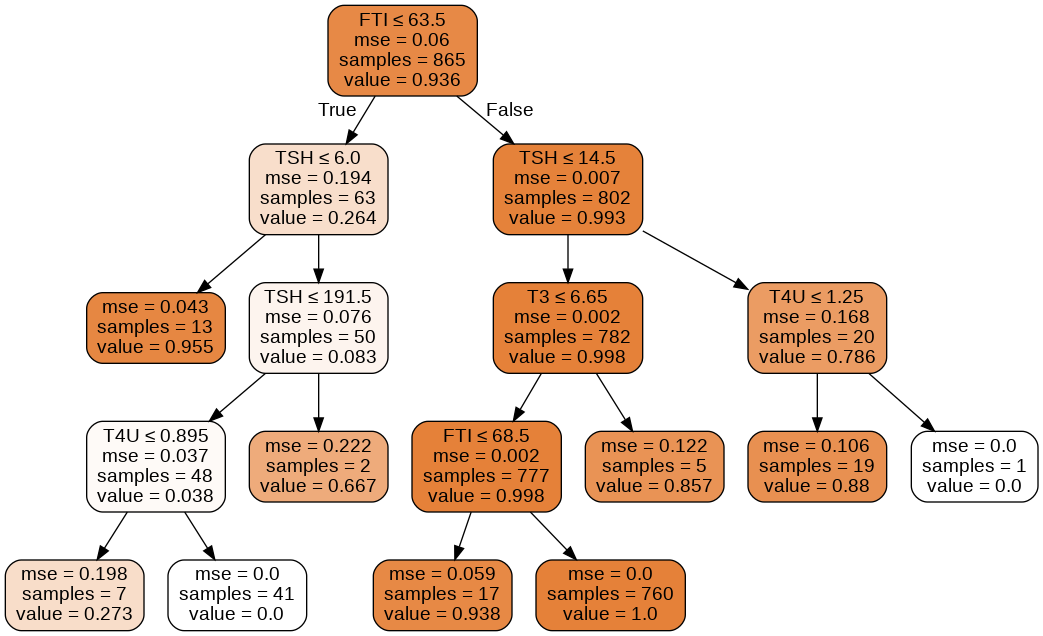

In [60]:
#Visualising the health forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('health_forest.png')
Image(graph.create_png())

In [61]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.23), ('T3', 0.0), ('TT4', 0.0), ('T4U', 0.04), ('FTI', 0.73)]

Variable: FTI                  Importance: 0.73
Variable: TSH                  Importance: 0.23
Variable: T4U                  Importance: 0.04
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor        

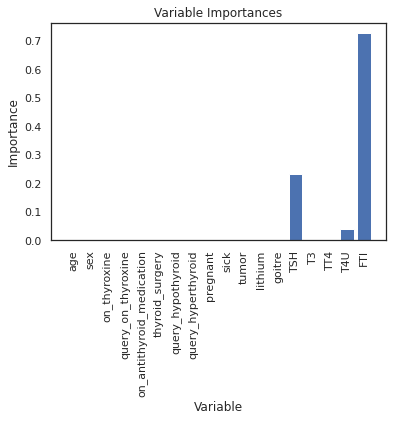

In [62]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The most important variables are TSH, T4U and FTI in determining the status of a patient.

# Ada Boost

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#creating an adaboost classifier object
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=400, random_state=42)


# Train it on our training set.
ada_boost = ada_boost.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = ada_boost.predict(X_test)

In [64]:
#Comparing Actual and Predicted

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
579,1,1
580,1,1
581,1,1
582,1,1


In [65]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9897260273972602


The model has an accuracy of 98%

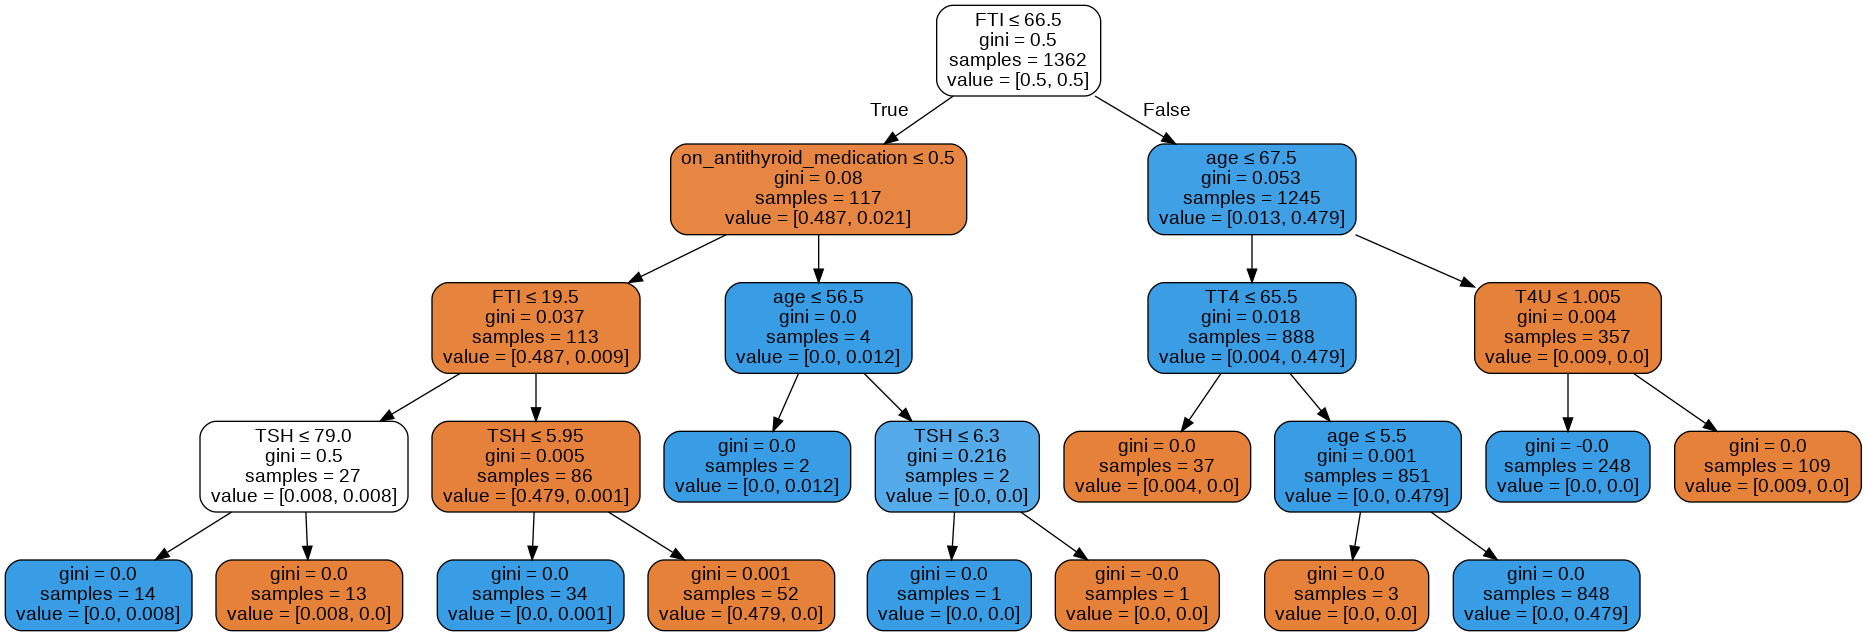

In [67]:
#Visualising the health forest with ada boost classifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = ada_boost.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('health_forest_adaboost.png')
Image(graph.create_png())


In [68]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.04), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.04), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.02), ('T3', 0.0), ('TT4', 0.02), ('T4U', 0.0), ('FTI', 0.88)]

Variable: FTI                  Importance: 0.88
Variable: age                  Importance: 0.04
Variable: on_antithyroid_medication Importance: 0.04
Variable: TSH                  Importance: 0.02
Variable: TT4                  Importance: 0.02
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor    

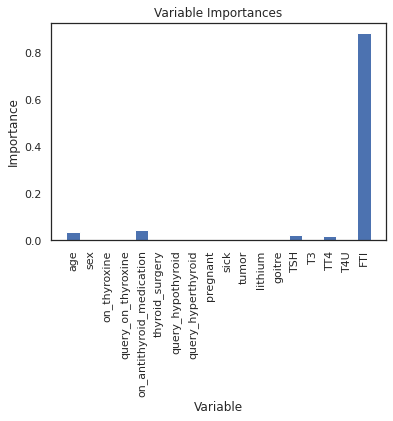

In [69]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Gradient Boost Classifier

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=4)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

In [71]:
#Comparing Actual and Predicted

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
579,1,1
580,1,1
581,1,1
582,1,1


In [72]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9897260273972602


Model has an accuracy of 98%

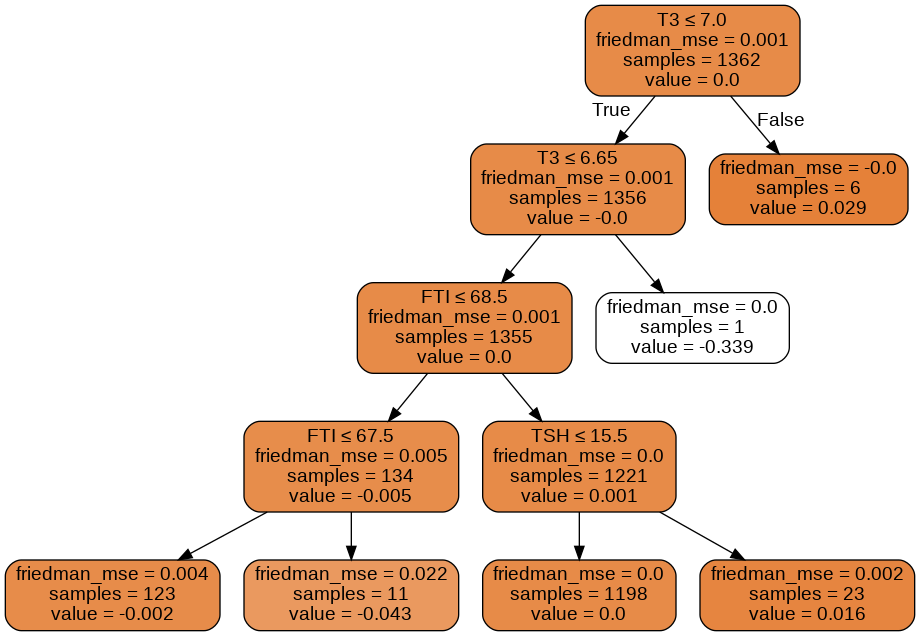

In [74]:
#Visualising the health forest with gradient boosting classifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = gbr.estimators_[50,0]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('health_forest_gradientboost.png')
Image(graph.create_png())

In [76]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.04), ('T3', 0.82), ('TT4', 0.0), ('T4U', 0.0), ('FTI', 0.14)]

Variable: T3                   Importance: 0.82
Variable: FTI                  Importance: 0.14
Variable: TSH                  Importance: 0.04
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor        

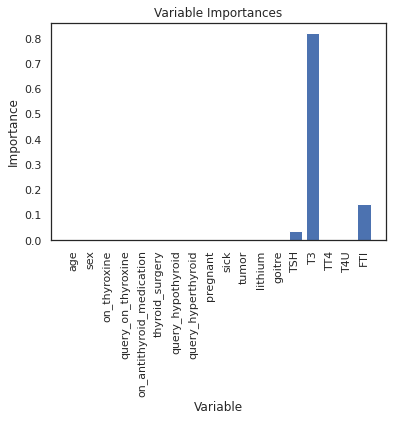

In [77]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The key variables in this model are TSH and FTI in determining if a patient is hypothyroid

# 2. Support Vextor Machines

In [94]:
health3.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,0,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,0,24,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,0,77,1,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


# Fitting the Model: Polynomial Function

In [78]:
# The way the dataset is right now, it would be difficult to plot the graph on a 2-Dimencional plane because the dataset has 4 features. 
# Therefore we need to reduce the feature by applying a reduction algorithm.

# Removing the target column
health_4 = health3.drop('status', axis=1)
y = health3['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(health_4)
X = pca.transform(health_4)
X.shape

(1946, 2)

In [79]:
print (X)

[[-137.99727731   -1.22527931]
 [-150.86024669  116.21777876]
 [-146.03867948  -18.56102897]
 ...
 [ -30.09013861  -21.77535861]
 [ -12.76899126  -27.5480186 ]
 [  45.83352542    0.53878333]]


Using PCA in the Poly function caused the function to crash endlessly.  

In [ ]:
#separating features from label

X = health3[['FTI','TSH']]
y = health3['status']

#  Split the data into train and test set
y = y.astype('category')
y = y.cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Creating an instance of the model
from sklearn.svm import SVC

poly_classifier = SVC(kernel = 'poly',degree=3,gamma=0.01)

# Train the model using the training set
poly_classifier.fit(X_train,y_train)

# Predict the response for the test set
#
y_pred = poly_classifier.predict(X_test)
print(y_pred)

# Model Evaluation
#print( accuracy_score(y_test, y_pred))

In [85]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))

0.9769230769230769


The Poly Kernal has an accuracy of 97%

# Fitting the Model: Linear Function

In [87]:
# The way the dataset is right now, it would be difficult to plot the graph on a 2-Dimencional plane because the dataset has 4 features. 
# Therefore we need to reduce the feature by applying a reduction algorithm.

# Removing the target column
health_5 = health3.drop('status', axis=1)
y = health3['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(health_5)
X = pca.transform(health_5)
X.shape

(1946, 2)

In [88]:
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Creating an instance and Building the model 
linear_svc = SVC(kernel = 'linear',degree=3,gamma='auto')

# Train the model using the training set
linear_svc.fit(X_train,y_train)

# Predict the response for the test set
#
y_pred = linear_svc.predict(X_test)
print(y_pred)

# making prediction
#y_pred = linear_svc.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.9846153846153847


The Linear Model has an accuracy of 98%

# Fitting the Model: Radial Basis Function (rbf)

In [89]:
# The way the dataset is right now, it would be difficult to plot the graph on a 2-Dimencional plane because the dataset has 4 features. 
# Therefore we need to reduce the feature by applying a reduction algorithm.

# Removing the target column
health_6 = health3.drop('status', axis=1)
y = health3['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(health_6)
X = pca.transform(health_6)
X.shape

(1946, 2)

In [92]:
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building and training model 
rbf_svc = SVC(kernel='rbf',C=3.0, degree=3,gamma='auto')

# Train the model using the training set
rbf_svc.fit(X_train,y_train)

# Predict the response for the test set
#
y_pred = rbf_svc.predict(X_test)
print(y_pred)


# Model Evaluation
print( accuracy_score(y_test, y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.9282051282051282


The RBF Model has an accuracy of 92%

Of all the functions the RBF was observed to perform very well with an accuracy of 92%

# 8. Challenging the Solution

Using the Sigmoid Kernel to challenge the solution

In [ ]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid',gamma = 'auto')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

In [93]:
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building and training model 
sigclassifier = SVC(kernel='sigmoid',gamma = 'auto')

# Train the model using the training set
sigclassifier.fit(X_train,y_train)

# Predict the response for the test set
#
y_pred = sigclassifier.predict(X_test)
print(y_pred)

# Model Evaluation
print( accuracy_score(y_test, y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
0.8794871794871795


The sigmoid function was used to challenge the solution but it performs less than all the other functions with an acuracy of 87%.

# 9. Follow up questions

The data had alot of missing values. Improvement needed to be done in the data collection.
